In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

### Tutorial [here](https://www.tensorflow.org/tutorials/images/data_augmentation)

In [112]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

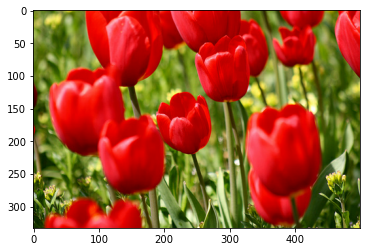

In [5]:
image, label = next(iter(train_ds))
_ = plt.imshow(image)

# Resize

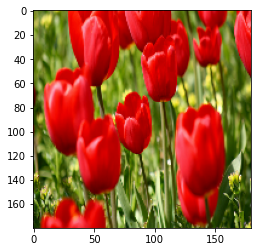

In [6]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])
result = resize_and_rescale(image)
_ = plt.imshow(result)

### Plot

In [28]:
def plot9(image_batch):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i])
        plt.axis("off")

### Gen batch

In [34]:
image_batch = tf.expand_dims(image, 0)
image_batch = tf.concat([image_batch for _ in range(9)], axis=0)
image_batch.shape, image.shape

(TensorShape([9, 333, 500, 3]), TensorShape([333, 500, 3]))

# Flip & Rotation

In [51]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"), # horizontal_and_vertical
  layers.experimental.preprocessing.RandomRotation(0.2),
])

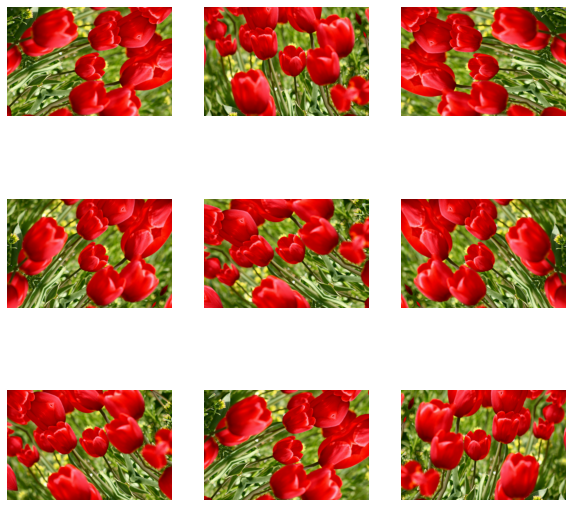

In [35]:
aug_images = data_augmentation(image_batch)
plot9(aug_images)

# Custom [invert]

In [70]:
def random_invert_img(image_batch, factor=0.5):
    def invert_(x):
        if  tf.random.uniform([]) < factor:
            return (255-x)
        else:
            return x
    return tf.map_fn(invert_, image_batch)
class RandomInvert(layers.Layer):
    def __init__(self, factor=0.5, **kwargs):
        super().__init__(**kwargs)
        self.factor = factor

    def call(self, x):
        return random_invert_img(x, self.factor)

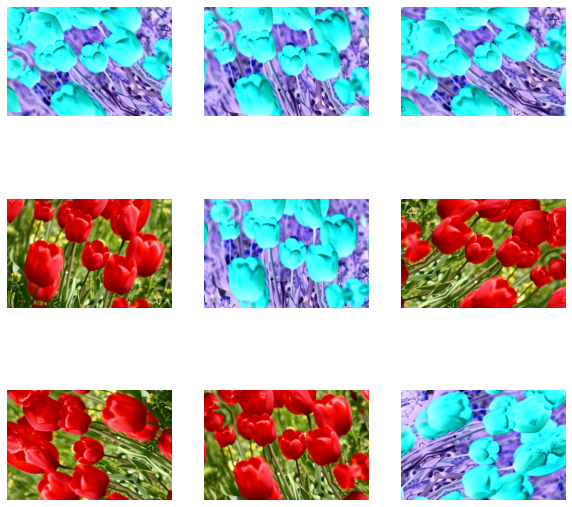

In [75]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"), # horizontal_and_vertical
    layers.experimental.preprocessing.RandomRotation(0.2),
    RandomInvert()
])
aug_images = data_augmentation(image_batch)
plot9(aug_images)

# ImageDataGenerator

In [2]:
def plot32(image_batch):
    print('--image_batch:', image_batch.shape)
    plt.figure(figsize=(10, 10))
    for i in range(len(image_batch)):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(image_batch[i])
        plt.axis("off")

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.expand_dims(x_train, 3)
train_ds = tf.data.Dataset.from_tensor_slices(
(x_train, y_train)).batch(batch_size=32) # .shuffle(10000)

tf.Tensor([5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8], shape=(32,), dtype=uint8)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8]
--image_batch: (32, 28, 28, 1)


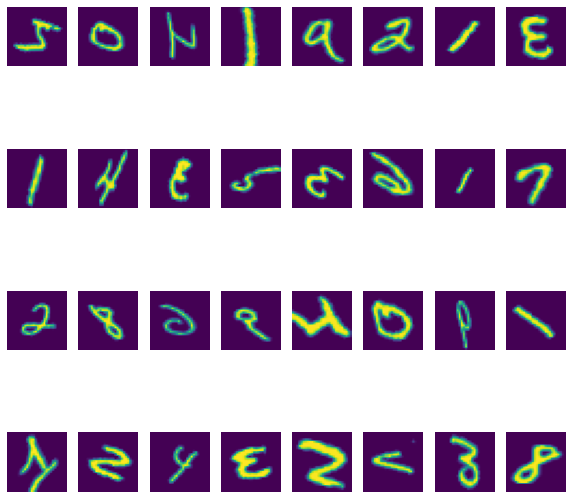

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True,
    shear_range=15,
    zoom_range=[.75, 1.5]
)
datagen.fit(x_train, rounds=1)
batches = 0
batch_size=32

for x_train, y_train in train_ds:
    print(y_train)
    aug_data = datagen.flow(x_train, y_train, shuffle=False)
    x_batch, y_batch = next(iter(aug_data))
    print(y_batch)
    plot32(x_batch)
    break

# for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=batch_size):
#     batches += 1
#     if batches >= len(x_train) / batch_size:
#         break